In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data();

In [3]:
ytrain=to_categorical(ytrain,10);
ytest=to_categorical(ytest,10);

In [4]:
xtrain=xtrain/255;
xtest=xtest/255;

In [5]:
xtrain=xtrain.reshape(xtrain.shape[0],784)
xtest=xtest.reshape(xtest.shape[0],784)

In [6]:
model=Sequential();
model.add(Dense(28*28,input_dim=28*28,activation = 'relu'));
model.add(Dense(28*28,activation='relu'));
model.add(Dense(10,activation='softmax'));
model.compile(adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy']);

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
print(model.summary());

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(xtrain,ytrain,validation_split=0.1,shuffle=1,epochs=10,batch_size=700,verbose=1);

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 162us/step - loss: 0.6849 - acc: 0.8592 - val_loss: 0.1177 - val_acc: 0.9657
Epoch 2/10
54000/54000 [==============================] - 8s 147us/step - loss: 0.1149 - acc: 0.9647 - val_loss: 0.1011 - val_acc: 0.9702
Epoch 3/10
54000/54000 [==============================] - 8s 147us/step - loss: 0.0797 - acc: 0.9755 - val_loss: 0.0941 - val_acc: 0.9713
Epoch 4/10
54000/54000 [==============================] - 8s 150us/step - loss: 0.0656 - acc: 0.9794 - val_loss: 0.0849 - val_acc: 0.9750
Epoch 5/10
54000/54000 [==============================] - 9s 161us/step - loss: 0.0520 - acc: 0.9832 - val_loss: 0.0878 - val_acc: 0.9763
Epoch 6/10
54000/54000 [==============================] - 9s 162us/step - loss: 0.0490 - acc: 0.9846 - val_loss: 0.0880 - val_acc: 0.9735
Epoch 7/10
54000/54000 [==============================] - 9s 157us/step - l

In [9]:
import cv2

(28, 28)


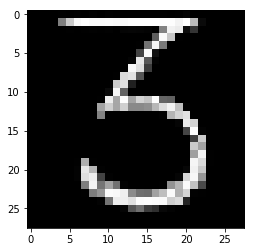

In [10]:
image=cv2.imread('1.jpg',cv2.IMREAD_GRAYSCALE);
image=cv2.bitwise_not(image);
image=image[100:380,250:530]
image=cv2.resize(image,(28,28))
print(image.shape);
plt.imshow(image,cmap='gray');

In [11]:
image=image/255;
image=image.reshape(1,28*28)

In [12]:
p=model.predict(image)

In [13]:
for i in range(0,10):
    print("%.5f"%p[0,i]); 

0.00000
0.00000
0.00000
0.00000
0.00000
1.00000
0.00000
0.00000
0.00000
0.00000


In [35]:
pr=model.predict_classes(image);

In [36]:
print(pr[0])

5


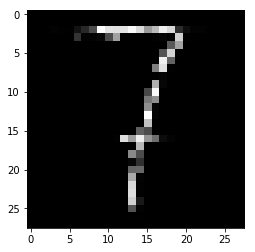

In [37]:
i=cv2.imread('2.jpg',cv2.IMREAD_GRAYSCALE);
i=i[60:400,230:570];
i=cv2.bitwise_not(i);
i=cv2.resize(i,(28,28))
plt.imshow(i,cmap='gray');

In [38]:
i=i/255;
im=i.reshape(1,28*28);

In [39]:
pred=model.predict(im);

In [40]:
for i in range(0,10):
    print("%.5f"%pred[0,i]); 

0.00000
0.14061
0.84616
0.00000
0.00002
0.00000
0.01320
0.00001
0.00000
0.00000


In [41]:
pre=model.predict_classes(im);
print(pre[0]);

2
